In [20]:
# import necesary packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
import glob as gb

In [21]:
# label the columns in the data
column_labels = ['years', 'months', 'days', 'precipitation']

# read data as a frame from location
data = df = pd.read_csv("./data/Synopdata/Kumasi_1960_2020_dRR_cgf.txt", header=None, sep='\s+', names=column_labels)

In [22]:
data = data[(data['years'] >= 1991) & (data['years'] <= 2020)]

In [23]:
# create a new column frame, date, to easily analyse and group data by preferred time-base
df['date'] = pd.to_datetime(df[['years', 'months', 'days']])

# Calculate the climatological daily mean
climatology_daily_mean = cdm = df.groupby(df.date.dt.dayofyear)['precipitation'].mean()

# calculate the climatological yearly mean
climatological_year_mean = cym = climatology_daily_mean.mean()


# calculate the precipitation anomaly as the difference between the climatological daily mean precipitation
# and the climatological-year mean precipitation
climatological_anomaly = anomaly = cdm - cym

# find the cumulative of the the anomalies
cumulative_anomaly = anomaly.cumsum()


[[  62.          247.        ]
 [-148.66851804   21.4436948 ]] [[198.         302.        ]
 [ 64.34642194 139.41825165]]


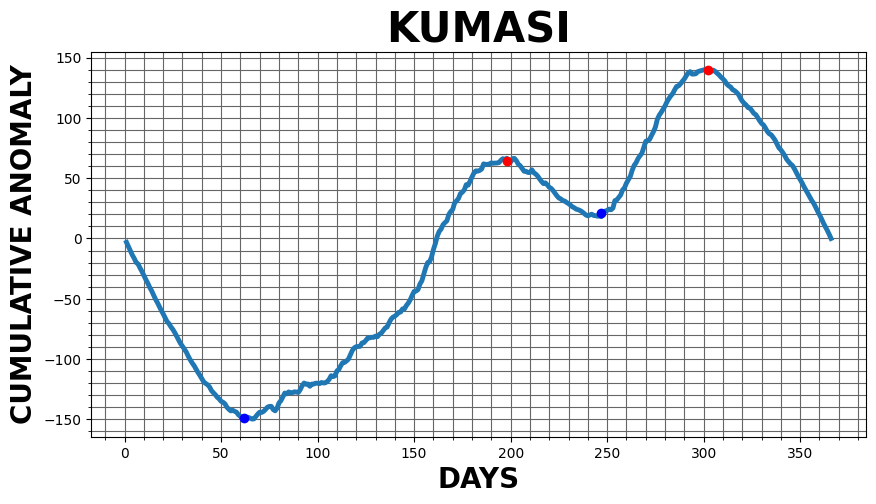

In [32]:
# plot the chart

# create the figure
fig = plt.figure(figsize=(10, 5))
plt.minorticks_on()
plt.grid(visible=True, which='both', axis='both', color='#666666', linestyle='-')

# labelling the diagram
plt.title('KUMASI', fontweight='bold', size="30")
plt.xlabel("DAYS", fontweight='bold', size="20")
plt.ylabel("CUMULATIVE ANOMALY", fontweight='bold', size="20")


# making the plot
ax = plt.subplot()
ax.plot(cumulative_anomaly, linewidth='3.5')

#Alternative One
#finding the onset and cessation
#this idea is to seperate the data into two parts based on the understanding of the weather of that location
# ax.plot(cumulative_anomaly.iloc[:190].idxmin(
# ), cumulative_anomaly[cumulative_anomaly.iloc[:190].idxmin()], 'ro')
# ax.plot(cumulative_anomaly.iloc[190:320].idxmin(
# ), cumulative_anomaly[cumulative_anomaly.iloc[190:320].idxmin()], 'ro')

anomaly = cumulative_anomaly.values
dx = 28
onset = []
cessation = []
for i in range(dx, len(anomaly)-dx):
    if min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1, anomaly[i+1]])
    if max(anomaly[i-dx:i+dx]) == anomaly[i]:
        cessation.append([i+1, anomaly[i+1]])
onset = np.copy(onset).T
cessation = np.copy(cessation).T

ax.plot(onset[0], onset[1], 'bo')
ax.plot(cessation[0], cessation[1], 'ro')

max_index = cumulative_anomaly.idxmax()
min_index = cumulative_anomaly.idxmin()

print(onset, cessation)

#writing the cumulative anomaly into a file
#df.to_csv("file path", format)

#saving the images
#plt.savefig("file path")



In [26]:
#np.savetxt("C:/Users/micha/OneDrive/Desktop/Rainfall Analysis Publication/text files/climatological cumulative/oac.txt", cessation)


# writing the cumulative anomaly into a file


# df.to_csv("C:/Users/micha/OneDrive/Desktop/Rainfall Analysis Publication/text files/climatological cumulative/sudan.txt",
#                     sep=',', index=False)

# saving the images
#plt.savefig(
#    "C:/Users/micha/OneDrive/Desktop/Rainfall Analysis Publication/images/climatological zones/Forest/Kumasi.jpg")